# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **

This is a classification problem, because the desired output is binary. The student either graduates or does not graduate, and this is what we will attempt to predict. 

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [5]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from time import time
from sklearn.metrics import f1_score

%matplotlib inline

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


In [6]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [7]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [8]:
# Convert string to 1,0 
student_data['passed'] = student_data['passed'].map(lambda x: 1 if x == 'yes' else 0)

In [10]:
# TODO: Calculate number of students
n_students = student_data.shape[0]

# TODO: Calculate number of features
n_features = student_data.shape[1] - 1

# TODO: Calculate passing students
n_passed = student_data['passed'].sum()

# TODO: Calculate failing students
n_failed = n_students - n_passed

# TODO: Calculate graduation rate
grad_rate = n_passed / float(n_students) * 100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [14]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [15]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


In [16]:
print X_all.shape
print y_all.shape

(395, 48)
(395,)


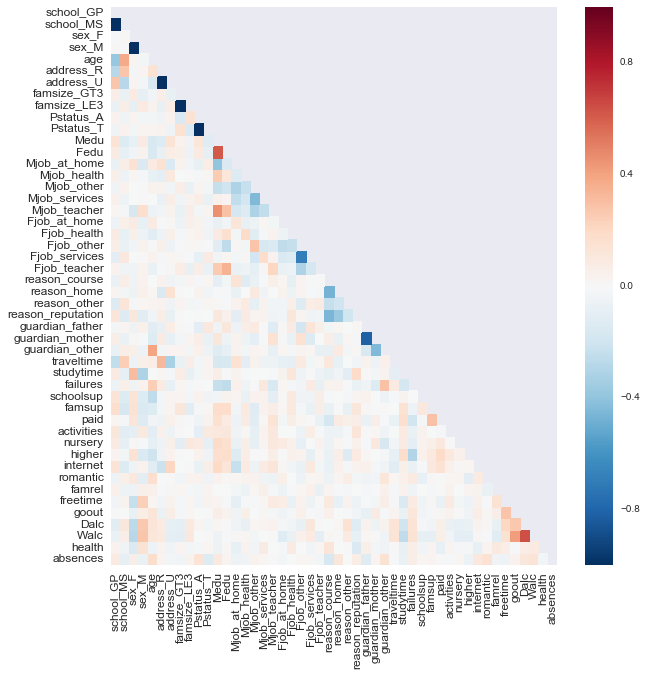

In [26]:
# Import seaborn plotting library
import seaborn as sns

# Create correlation heatmap
fig, ax = plt.subplots(figsize=(10,10))
corrs = X_all.corr()

# Generate mask for upper triangle 
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corrs, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, rotation=0)

plt.show()

In [28]:
# Explore mean values and standard deviations for feature set
X_all.describe().T[['mean','std']]

,mean,std
school_GP,0.883544,0.321177
school_MS,0.116456,0.321177
sex_F,0.526582,0.499926
sex_M,0.473418,0.499926
age,16.696203,1.276043
address_R,0.222785,0.416643
address_U,0.777215,0.416643
famsize_GT3,0.711392,0.453690
famsize_LE3,0.288608,0.453690
Pstatus_A,0.103797,0.305384


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [32]:
# TODO: Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# Normalize data, will be helpful for KNN classification and for Logistic Regression Regularization
ss = StandardScaler()
Xn = ss.fit_transform(X_all)
Xn = pd.DataFrame(Xn, columns=X_all.columns)

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(Xn, y_all, test_size=num_test, random_state=42, stratify=y_all)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: **

1. Logistic Regression is a powerful classifier that excels when the predictor variables are independent. It's also interpretable as each of the variables are assigned a coefficient that can be compared to determine which variables are most important. Logistic Regression is less effective, however, when there is a small amount of data relative to the number of features. Logistic Regression will struggle with categorical variables and variables that exhibit multicollinearity. Although there are not many data points and many of the features are categorical, I believe the interpretability, speed, and robustness of Logistic Regression will make it a good choice for this dataset.  
2. K-Nearest Neighbors is a simple, but effective classifier. KNN can learn complicated non-linear relationships well, and is especially strong with large datasets. As the data grows, however, computational complexity can prove problematic. As an instance-based method, KNN stores the training data in memory and defers computation until classification of testing samples. Additionally, KNN is uninterpretable and especially vulnerable to the curse of dimensionality. Despite these drawbacks, the simplicity of implementation and ability to draw complex inferences make KNN a good choice for this dataset. 
3. Gradient Boosted Trees are able to reduce error through combining many weak decision trees together. Each successive decision tree model is fit on the errors of a previous model. This effectively reduces bias, and variance to some extent. This approach, however, can lead to overfitting and can be difficult parameterize. If the parameters are appropriately tuned, GBT could prove very powerful on this dataset. It is also helpful that categorical variables are well suited to Decision Tree learners.

Real World Applications
1. Logistic Regression has been used to predict employee turnover. http://blog.minitab.com/blog/real-world-quality-improvement/using-binary-logistic-regression-to-investigate-high-employee-turnover
2. KNN has been used in news recommender systems. https://en.wikipedia.org/wiki/Recommender_system#cite_note-hybrids-36
3. A variant of Gradient Boosting, Adaboost, has been used to detect faces and other objects in images/video. https://en.wikipedia.org/wiki/Viola%E2%80%93Jones_object_detection_framework


### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [33]:
from sklearn.ensemble import RandomForestClassifier

train_predict(RandomForestClassifier(), X_train, y_train, X_test, y_test)

Training a RandomForestClassifier using a training set size of 300. . .
Trained model in 0.0544 seconds
Made predictions in 0.0030 seconds.
F1 score for training set: 0.9926.
Made predictions in 0.0024 seconds.
F1 score for test set: 0.7353.
Accuracy for test set: 0.6211.
Baseline Accuracy: 0.6737.


In [30]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred)


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))
    print "Accuracy for test set: {:.4f}.".format(clf.score(X_test, y_test))
    print "Baseline Accuracy: {:.4f}.".format(np.mean(y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [147]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# TODO: Initialize the three models
clf_A = LogisticRegression(random_state=1)
clf_B = KNeighborsClassifier()
clf_C = GradientBoostingClassifier(random_state=1)

# TODO: Set up the training set sizes
X_train_100 = X_train.iloc[:100,:]
y_train_100 = y_train.iloc[:100]

X_train_200 = X_train.iloc[:200,:]
y_train_200 = y_train.iloc[:200]

X_train_300 = X_train.iloc[:300,:]
y_train_300 = y_train.iloc[:300]

# TODO: Execute the 'train_predict' function for each classifier and each training set size
classifiers = [clf_A, clf_B, clf_C]
X_subsets = [X_train_100, X_train_200, X_train_300]
y_subsets = [y_train_100, y_train_200, y_train_300]

for clf in classifiers:
    for x, y in zip(X_subsets, y_subsets):
        train_predict(clf, x, y, X_test, y_test)
        print ''

Training a LogisticRegression using a training set size of 100. . .
Trained model in 0.0141 seconds
Made predictions in 0.1661 seconds.
F1 score for training set: 0.8873.
Made predictions in 0.0004 seconds.
F1 score for test set: 0.6774.
Accuracy for test set: 0.5789.
Baseline Accuracy: 0.6737.

Training a LogisticRegression using a training set size of 200. . .
Trained model in 0.0027 seconds
Made predictions in 0.0003 seconds.
F1 score for training set: 0.8261.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.7576.
Accuracy for test set: 0.6632.
Baseline Accuracy: 0.6737.

Training a LogisticRegression using a training set size of 300. . .
Trained model in 0.0027 seconds
Made predictions in 0.0002 seconds.
F1 score for training set: 0.8451.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.7519.
Accuracy for test set: 0.6526.
Baseline Accuracy: 0.6737.

Training a KNeighborsClassifier using a training set size of 100. . .
Trained model in 0.0019 seconds
Made pr

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - Logistic Regression **  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0141           |        0.0004          |      0.8873      |    0.6774       |
| 200               |        0.0027           |        0.0002          |      0.8261      |    0.7576       |
| 300               |        0.0027           |        0.0002          |      0.8451      |    0.7519       |

** Classifer 2 - KNN **  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |     0.0019              |        0.0015          |    0.8027        |    0.7534       |
| 200               |     0.0014              |        0.0037          |    0.8014        |    0.7324       |
| 300               |     0.0017              |        0.0058          |    0.8281        |    0.7671       |

** Classifer 3 - Gradient Boosted Trees **  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |       0.0756            |       0.0005           |    1.0000        |    0.7407       |
| 200               |       0.0874            |       0.0008           |    0.9924        |    0.7368       |
| 300               |       0.1085            |       0.0005           |    0.9781        |    0.7463       |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **

I believe that Logistic Regression is the best model to use for this analysis. Although KNN outperformed Logistic Regression in F1 score (77% vs. 75%), Logistic Regression is much faster in generating predictions. This will be useful to the administration when scaling up the analysis (e.g. district wide) and will enable the model to be run multiple times throughout the school year at low cost. Importantly, Logistic Regression can emphasize or de-emphasize features that do not have predictive power, whereas KNN places equal weight on all features. Also, Logistic Regression is interpretable and enables administrators to understand what the drivers are for students who fail to graduate. Long-term structural changes can be put into practice that improve graduation rates over time. 

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **

The final model (Logistic Regression) was developed using data from approximately 400 students. Specifically, students that graduated and students that didn't graduate were analyzed based on a number of additional factors, such as age, sex, class absences, health, etc. The model begins by applying different weights to these factors. Each combination of weights is then tested to see how many student's graduation outcome were correctly predicted. Once the optimal combination of weights has been calculated, this can be used to make new predictions.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [158]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Create the parameters list you wish to tune
parameters = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.linspace(0.0001, 500, 50)
}

# TODO: Initialize the classifier
clf = LogisticRegression()

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score)

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, verbose=1, n_jobs=-1, scoring=f1_scorer, cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print 'Best Estimator: ', clf
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/alexanderhalcomb/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/alexanderhalcomb/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/alexanderhalcomb/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/alexanderhalcomb/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', ave

Best Estimator:  LogisticRegression(C=10.204179591836734, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Made predictions in 0.0006 seconds.
Tuned model has a training F1 score of 0.8443.
Made predictions in 0.0002 seconds.
Tuned model has a testing F1 score of 0.7519.


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.8s finished


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **

The final tuned model's F1 score for training and testing is 0.8443 and 0.7519, respectively. This compares to a training score for the untuned model of 0.8507 and a testing score of 0.7519. The tuned model score is unchanged, which is surprising. Specifically, I would have expected the regularization penalty to have a positive impact on the score as the dataset is highly imbalanced with respect to number of features (48) to number of data points (395). 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.